## K-means Algorithm

### Class: `KMeans`

#### Methods
- `__init__(k=3)`: Initialize with `k` clusters.
- `fit(X)`: Fit model to data `X`.
- `predict(X)`: Predict closest cluster for each point in `X`.
- `get_centroids()`: Get centroids.

#### Steps in `fit`
1. **Initialize Centroids**: Randomly pick `k` points from `X`.
2. **Iterate**: 
  - Calculate distances to centroids.
  - Assign points to closest centroid.
  - Update centroids.
  - Repeat until centroids stabilize.

#### Utility Functions
- `euclidean_distance()`: Distance between points.
- `cross_euclidean_distance()`: Cross distance.
- `euclidean_distortion()`: K-means distortion.
- `euclidean_silhouette()`: Silhouette Coefficient.

### Usage
1. `model = KMeans(k=3)`
2. `model.fit(X)`
3. `labels = model.predict(X)`
4. `centroids = model.get_centroids()`


In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import k_means as km # <-- Your implementation


sns.set_style('darkgrid')

In [19]:
data_2 = pd.read_csv('data_2.csv')
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,800.0,46.788514,28.444733,-3.997498,23.358189,45.548783,63.753638,110.968060
x1,800.0,5.179252,3.350627,-0.951290,1.713055,6.463184,7.780812,11.562562


Distortion: 669.831
Silhouette Score: 0.594


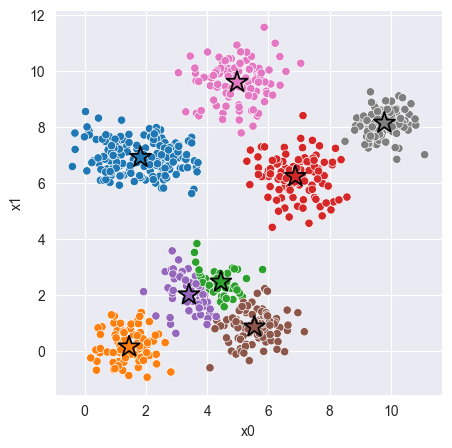

In [20]:
# Fit Model 
data_2['x0'] = data_2['x0'] / 10

X = data_2[['x0', 'x1']]
model_2 = km.KMeans(k=8)  # <-- Feel free to add hyperparameters 
model_2.fit(X)



# Compute Silhouette Score 
z = model_2.predict(X)



print(f'Distortion: {km.euclidean_distortion(X, z) :.3f}')
print(f'Silhouette Score: {km.euclidean_silhouette(X, z) :.3f}')

# Plot cluster assignments
C = model_2.get_centroids()
K = len(C)
_, ax = plt.subplots(figsize=(5, 5), dpi=100)
sns.scatterplot(x='x0', y='x1', hue=z, hue_order=range(K), palette='tab10', data=X, ax=ax);
sns.scatterplot(x=C[:,0], y=C[:,1], hue=range(K), palette='tab10', marker='*', s=250, edgecolor='black', ax=ax)
ax.legend().remove();